# Модуль В.  Построение, обучение и оптимизация модели.

### 3.1 Разбиение выборки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from tqdm import notebook
import requests
import re
import os
%matplotlib inline
import glob
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.stem import wordnet 
from nltk import pos_tag  
from nltk import word_tokenize 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import pairwise_distances 
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
import zipfile
import xml.etree.ElementTree as ET
import docx
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
data=pd.read_csv("meeting/data_3.csv")

**Исследование целевой переменной**

*   *Проверка нормальности распределения целевой переменной*

*Для начало необходимо посмотреть на нормальность распределения целевого признака **rate**.Для этого выведем график распределения.*

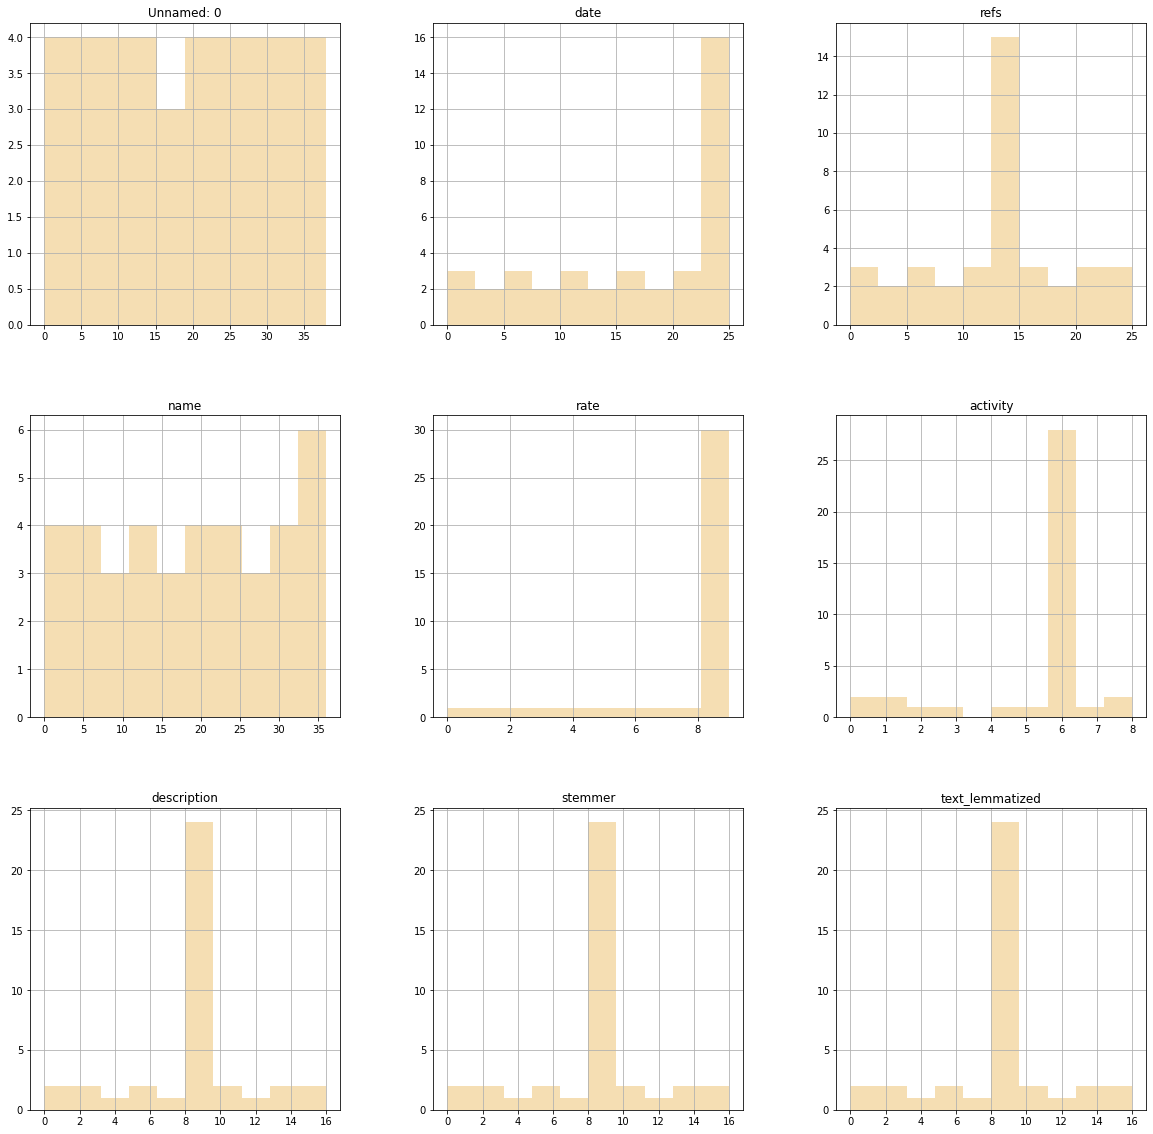

In [3]:
data.hist(figsize=(20,20),color="wheat",bins=10);

C:\Users\blend\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


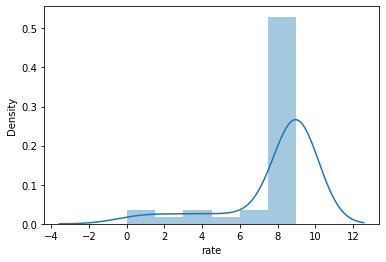

In [4]:
sns.distplot(data["rate"]);

*При просмотре графиков можно увидеть, что плотность распределения нормальная, синометричная, так как больше значений распалагается по середине. Также можно сделать вывод, что больше всего компании имеют рейтинг от 7-9.*

*   *Вычисление асимметрии набора данных.*

In [5]:
rate=data["rate"].values

In [6]:
print(skew(rate, axis=0, bias=True))

-2.0328178021372674


*Исходя из вычислений можно сказать, что распределение отрицательно искажено*

*   *Вычисление эксцесса набора данных.*

In [7]:
print(kurtosis(rate, axis=0, bias=True))

2.7834937751200792


*Исходя из вычислений можно сказать, что распределение имеет маленькое количество хвостов, что свойтвенно при нормальном распределении.*

**Разбиение выборки на обучающую и тестовую**

*Теперь разделим наши данные на тестувую и тренировочную части, что бы при поступлении новых данных наша модель давала правельные результаты,разделять данные можно многими способами, но я воспользуюсь самым стандартным train_test_split, так как его легче и удобнее всего применять при классификации:*

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()
df_scaler=scaler.fit_transform(data.drop('rate', axis=1))
df_new=pd.DataFrame(df_scaler, columns=(data.drop('rate',axis=1).columns))

*Так как данные несбалансированы, стоит разделить из по следующемуалгоритму*

*Создадим новый train датасет методом upsampling: возьмём все данные с классом 1, продублируем его rat раз, присоединим к данным класса 0 продублированный класс 1 и перемещаем*

In [10]:
x=df_scaler.copy()
y=data['rate']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.33, random_state=10)

### 3.2 Оптимизация модели

**Построение модели классфикации**

*  *Выбор алгоритмов классификации*

*Для обучения на классификация я буду использовать алгоритмы: Гауссов Наивный Байес, XLNet, XGBOOST, так как они очень хорошо работают с текстовыми данными.XGBoost расшифровывается как eXtreme Gradient Boosting. Это контролируемый алгоритм машинного обучения, который используется как для задач классификации, так и для регрессии. Это работает путем последовательного построения нескольких моделей дерева решений, которые называются базовыми обучаемыми. Каждый из этих базовых обучаемых вносит свой вклад в прогнозирование с помощью некоторых важных оценок, которые улучшают алгоритм. Эффективно комбинируя все оценки базовых учащихся, модели XGBoost принимают точные решения.XLNet - это обобщенная авторегрессионная модель предварительной подготовки к пониманию языка, разработанная CMU и Google для выполнения задач NLP, таких как классификация текста, понимание прочитанного, ответы на вопросы, анализ настроений и многое другое. Это одна из лучших моделей для обработки языка, поскольку она использует преимущества процессов авторегрессии и автокодирования, которые используются в некоторых популярных моделях, таких как модели transformerXL и BERT.Гауссов Наивный Байес - реализует гауссовский наивный алгоритм Байеса для классификация. Предполагается, что вероятность появления признаков является гауссовой.*

*  *Обучение данных на классификации*

*XGBOOST*

In [11]:
from xgboost import XGBClassifier

In [12]:
xgb=XGBClassifier(random_state=110,n_estmats=22, learning_rate=0.19,min_child_weight=1,gamma=0,subsample=0.9,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27)

In [13]:
xgb.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.8, learning_rate=0.19, n_estmats=22, nthread=4,
              objective='multi:softprob', random_state=110, seed=27,
              subsample=0.9)

In [14]:
y_pred_xgb=xgb.predict(x_test)

In [15]:
xgb.score(x_test, y_test)

0.8461538461538461

*XLNet*

In [16]:
from sklearn.neural_network import MLPClassifier

In [17]:
mlp=MLPClassifier(random_state=10)

In [18]:
mlp.fit(x_train, y_train)

C:\Users\blend\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=10)

In [19]:
y_pred_mlp=mlp.predict(x_test)

In [20]:
mlp.score(x_test, y_test)

0.8461538461538461

*Гауссов Наивный Байес*

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
nb=GaussianNB()

In [23]:
nb.fit(x_train, y_train)

GaussianNB()

In [24]:
y_pred_nb=nb.predict(x_test)

In [25]:
nb.score(x_test, y_test)

0.8461538461538461

*  *Выбор метрики для измерения качества обучения*

*В качетве метрики я буду использовать F1-мера -гармоническое среднее между точностью и полнотой. Такая метрика хорошо сможет оценивать модели взятые ранее.*

In [26]:
from sklearn.metrics import f1_score

*Оценка XGBOOST*

In [27]:
f1_score(y_test, y_pred_xgb, average='macro')

0.2391304347826087

In [28]:
f1_score(y_test, y_pred_xgb, average='micro')

0.8461538461538461

In [29]:
f1_score(y_test, y_pred_xgb, average='weighted')

0.8093645484949833

In [30]:
f1_score(y_test, y_pred_xgb, average=None)

array([0.        , 0.        , 0.        , 0.95652174])

*Оценка XLNet*

In [31]:
f1_score(y_test, y_pred_mlp, average='macro')

0.2

In [32]:
f1_score(y_test, y_pred_mlp, average='micro')

0.8461538461538461

In [33]:
f1_score(y_test, y_pred_mlp, average='weighted')

0.8461538461538461

In [34]:
f1_score(y_test, y_pred_mlp, average=None)

array([0., 0., 0., 0., 1.])

*Оценка Гауссов Наивный Байес*

In [35]:
f1_score(y_test, y_pred_nb, average='macro')

0.3055555555555555

In [36]:
f1_score(y_test, y_pred_nb, average='micro')

0.8461538461538461

In [37]:
f1_score(y_test, y_pred_nb, average='weighted')

0.7756410256410255

In [38]:
f1_score(y_test, y_pred_nb, average=None)

array([0.        , 0.        , 0.91666667])

*  *Определение лучшей модели*

*Из всех алгоритмов, лучшую точность показал классификатор XGBOOST, так как у него больше всего вероятность правильного прогноза*

**Оптимизация модели**

*   *Выбор значимых признаков*

*Выберем пять признаков, у которых хорошая корреляция с целевым атрибутом.*

<AxesSubplot:>

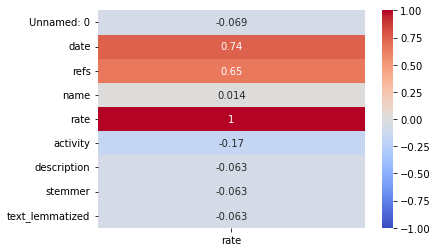

In [39]:
upp_mat = np.triu(data.corr())
sns.heatmap(data.corr()[['rate']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

*По тепловой карте можно сказать, что хорошей корреляцией обладают следующие признаки: name, activity, description, stemmer, text_lemmatize*

In [40]:
data=[["name","rate","description","stemmer","text_lemmatized","activity"]]

* *Оптимизация модели путем настройки гиперпараметров модели*

In [41]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

In [42]:
x, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=1, random_state=1)

In [43]:
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.864 (0.036)


In [44]:
from numpy import mean
from numpy.random import randn
from numpy.random import rand
from numpy.random import randint
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# objective function
def objective(X, y, cfg):
    lrate, n_tree, subsam, depth = cfg
    model = XGBClassifier(learning_rate=lrate, n_estimators=n_tree, subsample=subsam, max_depth=depth)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    result = mean(scores)
    return result

# take a step in the search space
def step(cfg):
    lrate, n_tree, subsam, depth = cfg
    lrate = lrate + randn() * 0.01
    if lrate <= 0.0:
        lrate = 1e-8
    if lrate > 1:
        lrate = 1.0
    n_tree = round(n_tree + randn() * 50)
    if n_tree <= 0.0:
        n_tree = 1
    subsam = subsam + randn() * 0.1
    if subsam <= 0.0:
        subsam = 1e-8
    if subsam > 1:
        subsam = 1.0
    depth = round(depth + randn() * 7)
    if depth <= 1:
        depth = 1
    return [lrate, n_tree, subsam, depth]

# hill climbing local search algorithm
def hillclimbing(X, y, objective, n_iter):
    solution = step([0.1, 100, 1.0, 7])
    solution_eval = objective(X, y, solution)
    for i in range(n_iter):
        candidate = step(solution)
        candidate_eval = objective(X, y, candidate)
        if candidate_eval >= solution_eval:
            solution, solution_eval = candidate, candidate_eval
            print('>%d, cfg=[%s] %.5f' % (i, solution, solution_eval))
        return [solution, solution_eval]

x, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=1, random_state=1)
n_iter = 200
cfg, score = hillclimbing(x, y, objective, n_iter)
print('Done!')
print('cfg=[%s]: Mean Accuracy: %f' % (cfg, score))

>0, cfg=[[0.11123290344643812, 81, 0.9776331686426659, 6]] 0.85433
Done!
cfg=[[0.11123290344643812, 81, 0.9776331686426659, 6]]: Mean Accuracy: 0.854333


* *Кривые валидации и обучения*

*Кривая валидации и обучения*

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

In [46]:
from sklearn.model_selection import validation_curve

C:\Users\blend\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\blend\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\blend\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\blend\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\blend\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\blend\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\blend\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\blend\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

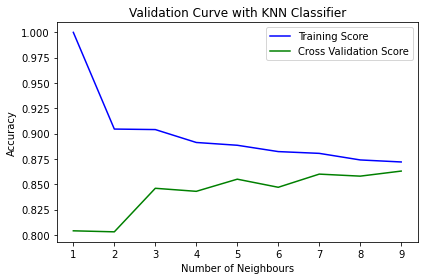

In [51]:
parameter_range = np.arange(1, 10, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), x, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with XGBoost Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

* *Сохранение модели для дальнейшего использования*

In [52]:
from flask import render_template, request, jsonify
import flask
import numpy as np
import traceback
import pickle
import pandas as pd

In [53]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(y_pred_xgb, file)

### 3.3 Подготовка отчета

*В этом модуле продолжается работа с данными, подготовленными в предыдущей сессии. Требуется осуществить выбор алгоритма классификации, построить модель и провести оптимизацию полученной модели машинного обучения в контексте исследуемой задачи.*